In [1]:
from nilearn import plotting, image
import nibabel as nib
import os
import numpy as np
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
%run loading_data.ipynb
sub_data = load_txt(n=200)
unrestricted_data = load_unrestricted()
restricted_data = load_restricted()
atlas = load_atlas(n=200)

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data

Subject Data Loaded
unrestricted_data loaded
restricted_data loaded


/tmp/ipykernel_4727/1030149754.py:16: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas = image.threshold_img(atlas, "99.5%")


atlas has shape ['x', 'y', 'z', 'region'] = (91, 109, 91, 200)


In [31]:
# atlas = image.load_img("HCP_PTN1200/groupICA/groupICA_3T_HCP1200_MSMAll_d100.ica/melodic_IC_sum.nii.gz")
# atlas = image.threshold_img(atlas, "99.5%") 
# print("atlas has shape", ["x", "y", "z", "region"], "=", atlas.shape)

# fig, axs = plt.subplots(nrows=1, figsize=(10, 5))
# plotting.plot_prob_atlas(atlas, colorbar=True, draw_cross=False, axes=axs)
# axs.set_title("Map of Brain Regions")

In [3]:
#plotting connections on the brain
atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
atlas_coords = np.array(atlas_coords)

In [4]:
def euclidean(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return (distance) ** 0.5

In [5]:
def find_closest_point(atlas_coords, reference_point):
    # indices = [i for k,v in rois.items() for i, coord in enumerate(atlas_coords) if np.all(np.isclose(coord, v, rtol=1))]
    # if len(indices) == 0:
        # return None
    dist = np.inf
    closest_idx = None
    points=[]
    for idx in range(len(atlas_coords)):
        i = atlas_coords[idx]
        curr_dist = euclidean(reference_point, i)
        # dist.append(curr_dist)
        # points.append(i)
        # closest_idx.append(idx)
        if curr_dist < dist:
            dist = curr_dist
            closest_point = i
            closest_idx = idx
    # dist = sorted(zip(dist, points))[:10]
    # dist2 = sorted(zip(dist, closest_idx))[:10]
    
    print(dist, closest_point)
    return closest_idx

In [6]:
rois = {
    "Left M1": [-38, -24, 62],
    "Right M1": [34, -22, 62],
    "Left SMA" : [-8, 0, 54],
    "Right SMA" : [8, 0, 54],
    "Left PMd": [-16, -20, 48],
    "Right PMd": [34, -8, 52]}

In [7]:
all_points = set()
for k, v in rois.items():
    print(f"Closest point to {k}:")
    closest = find_closest_point(atlas_coords, v)
    all_points.add(closest)

Closest point to Left M1:
6.508918785949374 [-42.95098844 -24.68496559  57.8305205 ]
Closest point to Right M1:
11.485082596078373 [ 44.26393131 -21.37248228  56.88482085]
Closest point to Left SMA:
13.664893703066346 [-2.23353823  4.34613776 65.60122084]
Closest point to Right SMA:
16.068682059114725 [-2.23353823  4.34613776 65.60122084]
Closest point to Left PMd:
18.29657020959966 [-21.41821055 -28.96570539  63.00078674]
Closest point to Right PMd:
17.55087014717411 [ 44.26393131 -21.37248228  56.88482085]


In [8]:
all_points

{42, 47, 54, 64}

Text(0.5, 1.0, 'Map of Brain Regions')

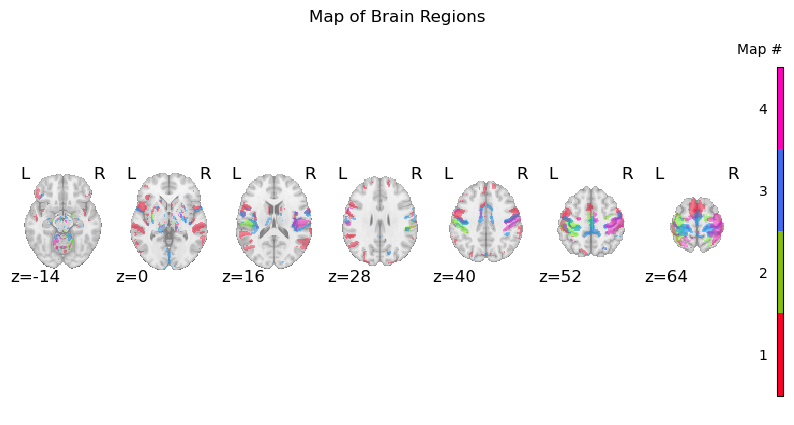

In [9]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 5))
selected_regions = image.index_img(atlas, list(all_points))
plotting.plot_prob_atlas(selected_regions, colorbar=True, draw_cross=False, axes=axs, display_mode="z")
axs.set_title("Map of Brain Regions")

ValueError: data mapping points must start with x=0 and end with x=1

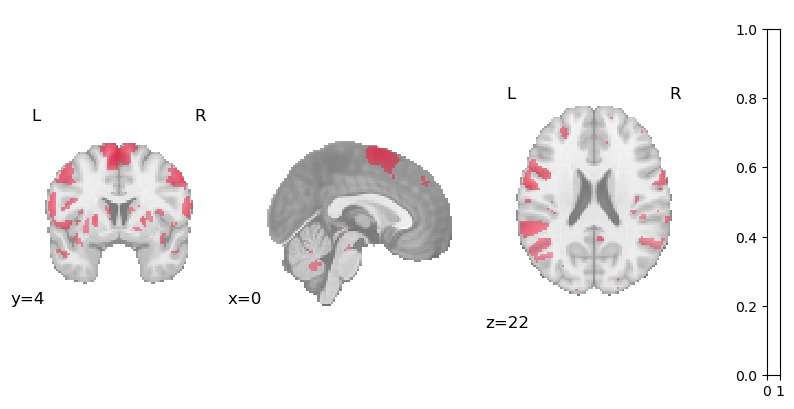

In [17]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 5))
selected_regions = image.index_img(atlas, list(all_points)[:1])
plotting.plot_prob_atlas(selected_regions, colorbar=True, draw_cross=False, axes=axs)
axs.set_title("Map of Brain Regions")

In [101]:
#finding the names of the ROIs

from nilearn import image, plotting
from atlasreader.atlasreader import read_atlas_peak

"""
available reference atlases
---------------------------
    "aal",
    "aicha",
    "desikan_killiany",
    "destrieux",
    "harvard_oxford",
    "juelich",
    "marsatlas",
    "neuromorphometrics",
    "talairach_ba",
    "talairach_gyrus",
 """
brain_region = []
print("BRAIN REGIONS:\n--------------")
for atlas_coord in atlas_coords:
    region = read_atlas_peak("harvard_oxford", atlas_coord)
    print(region)
    brain_region += [region]

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data

BRAIN REGIONS:
--------------
[[np.float64(62.0), 'Right_Occipital_Pole']]
[[np.float64(50.0), 'Right_Lateral_Occipital_Cortex_superior_division'], [np.float64(30.0), 'Right_Angular_Gyrus']]
[[np.float64(56.0), 'Right_Lateral_Occipital_Cortex_inferior_division'], [np.float64(14.0), 'Right_Occipital_Pole']]
[[np.float64(54.0), 'Left_Cuneal_Cortex'], [np.float64(9.0), 'Right_Cuneal_Cortex']]
[[np.float64(81.0), 'Left_Supramarginal_Gyrus_anterior_division'], [np.float64(6.0), 'Left_Supramarginal_Gyrus_posterior_division']]
[[np.float64(85.0), 'Right_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(66.

In [102]:
#select the correct region with largest probability given from the library
brain_region = [
    max(inner_list, key=lambda x: x[0])[-1] if inner_list else None for inner_list in brain_region
]
np.array(brain_region)[list(all_points)]

array(['Left_Postcentral_Gyrus', 'Right_Postcentral_Gyrus',
       'Right_Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)'],
      dtype='<U73')